# K Nearest Neighbors

## 1. Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, accuracy_score

## 2. Load the dataset

In [2]:
dataset = pd.read_csv('wine_updated.csv')
x = dataset[['Alcohol', 'Ash']].values
y = dataset['Class'].values

## 3. Split the dataset into training and testing sets

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## 4. Feature scaling

In [4]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 5. Instantiating the classifier and training it on the training set

In [5]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
y_train = y_train.ravel()
knn.fit(x_train, y_train)

KNeighborsClassifier()

## 6. Make predictions on test data

In [6]:
y_pred = knn.predict(x_test)

## 7. Evaluate the model

In [7]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrx:')
print(cm)

Confusion Matrx:
[[13  0  1]
 [ 0 13  1]
 [ 4  1  3]]


In [8]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score: {:.2f}%'.format(accuracy*100))

Accuracy Score: 80.56%


## 8. Visualize the decision boundary for training set

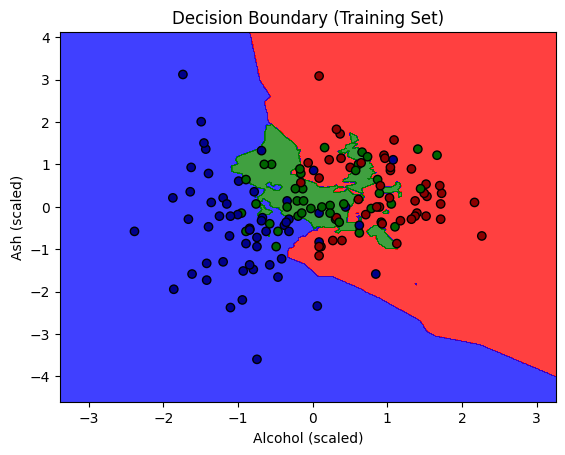

In [9]:
# Define the range for the grid
x1_range = np.arange(start=x_train[:, 0].min()-1, stop=x_train[:, 0].max()+1, step=0.01)
x2_range = np.arange(start=x_train[:, 1].min()-1, stop=x_train[:, 1].max()+1, step=0.01)

# Create the grid of x1 and x2 values
x1, x2 = np.meshgrid(x1_range, x2_range)

# Predict class labels for each grid point
grid_points = np.c_[x1.ravel(), x2.ravel()]
grid_predict = knn.predict(grid_points).reshape(x1.shape)

# Plot the decision boundary
plt.contourf(x1, x2, grid_predict, alpha=0.75, cmap=ListedColormap(['red', 'blue', 'green']))

# Overlay the training data
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=ListedColormap(['darkred', 'darkblue', 'darkgreen']), edgecolors='k')
plt.title('Decision Boundary (Training Set)')
plt.xlabel('Alcohol (scaled)')
plt.ylabel('Ash (scaled)')
plt.show()

## 9. Visualize the decision boundary for the test set

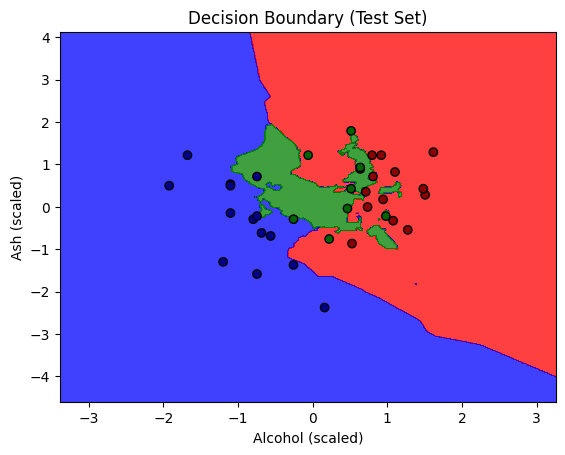

In [10]:
grid_points = np.c_[x1.ravel(), x2.ravel()]
grid_predict = knn.predict(grid_points).reshape(x1.shape)

# Plot the decision boundary
plt.contourf(x1, x2, grid_predict, alpha=0.75, cmap=ListedColormap(['red', 'blue', 'green']))

# Overlay the training data
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=ListedColormap(['darkred', 'darkblue', 'darkgreen']), edgecolors='k')
plt.title('Decision Boundary (Test Set)')
plt.xlabel('Alcohol (scaled)')
plt.ylabel('Ash (scaled)')
plt.show()

## 10. Predict on new data

In [11]:
new_predict = np.array([[14.3, 3.2], [13.5, 3.7], [12.5, 1.6]])
scaled_new_predict = sc.transform(new_predict)
new_result = knn.predict(scaled_new_predict)
print('Prediction based on new data: ', new_result)

Prediction based on new data:  [1 1 2]
